In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers
import random
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Flatten, LSTM, Bidirectional, Input, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.utils import plot_model

In [2]:
EEG = pd.read_csv("EEG.csv")

In [3]:
EEG

,Unnamed: 0,obs,time,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation,Derived,totPwr,status
0,0.0,286.0,302.0,33448,7054,1692,8833,9796,17692,8025,6926,27,44,0,93466,0
1,0.0,286.0,302.0,33448,7054,1692,8833,9796,17692,8025,6926,27,44,0,93466,0
2,1.0,287.0,303.0,608545,25029,20343,25430,17084,8580,4385,2455,38,56,0,711851,0
3,1.0,287.0,303.0,608545,25029,20343,25430,17084,8580,4385,2455,38,56,0,711851,0
4,2.0,288.0,304.0,4719,3386,4546,60240,9943,23837,8403,2252,50,66,0,117326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,NaN,NaN,NaN,211355,14593,4594,3953,1269,2681,2298,451,35,47,NA,241194,1
13496,NaN,NaN,NaN,1769201,676309,144288,170323,81213,128252,142854,30079,43,51,NA,3142519,1
13497,NaN,NaN,NaN,1769201,676309,144288,170323,81213,128252,142854,30079,43,51,NA,3142519,1
13498,NaN,NaN,NaN,1769201,676309,144288,170323,81213,128252,142854,30079,43,51,NA,3142519,1


In [4]:
EEG.drop(columns = ['Unnamed: 0','obs',' time',' Derived'],inplace=True)

In [5]:
y = EEG.pop('status')
X = EEG

In [6]:
X = StandardScaler().fit_transform(X)

In [8]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = np.array(X_train).reshape(-1,11,1)
x_test = np.array(x_test).reshape(-1,11,1)

In [9]:
def LSTM_Model(optimizer='adam'):
    model = Sequential()
    model.add(InputLayer(input_shape=(11, 1)))
    model.add(Dense(64, activation='relu'))
    model.add(Bidirectional(LSTM(256, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(256, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
batch_size=128
lstm_model = LSTM_Model()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
lstm_hist = lstm_model.fit(X_train, y_train,
                           validation_data=(x_test, y_test),
                           epochs=25,
                           steps_per_epoch=X_train.shape[0]//batch_size,
                          callbacks=[es])

Epoch 1/25
84/84 [==============================] - 26s 232ms/step - loss: 0.6791 - accuracy: 0.5925 - val_loss: 0.6689 - val_accuracy: 0.6037
Epoch 2/25
84/84 [==============================] - 18s 219ms/step - loss: 0.6747 - accuracy: 0.5952 - val_loss: 0.6679 - val_accuracy: 0.6100
Epoch 3/25
84/84 [==============================] - 18s 211ms/step - loss: 0.6732 - accuracy: 0.5988 - val_loss: 0.6652 - val_accuracy: 0.6119
Epoch 4/25
84/84 [==============================] - 18s 214ms/step - loss: 0.6725 - accuracy: 0.5981 - val_loss: 0.6663 - val_accuracy: 0.6107
Epoch 5/25
84/84 [==============================] - 18s 211ms/step - loss: 0.6703 - accuracy: 0.6006 - val_loss: 0.6671 - val_accuracy: 0.6078
Epoch 6/25
84/84 [==============================] - 17s 206ms/step - loss: 0.6680 - accuracy: 0.6031 - val_loss: 0.6626 - val_accuracy: 0.6104
Epoch 7/25
84/84 [==============================] - 17s 207ms/step - loss: 0.6650 - accuracy: 0.6063 - val_loss: 0.6581 - val_accuracy: 0.6159

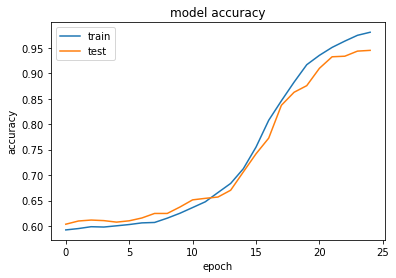

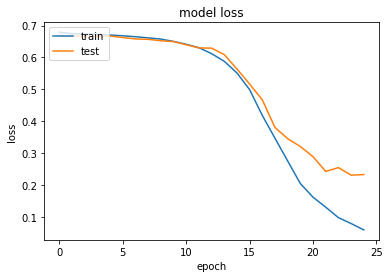

In [11]:
plt.plot(lstm_hist.history['accuracy'])
plt.plot(lstm_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('fig.png')
plt.show()
# summarize history for loss
plt.plot(lstm_hist.history['loss'])
plt.plot(lstm_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('fig1.png')
plt.show()

In [12]:
y_pred =lstm_model.predict(x_test)
y_pred = np.array(y_pred >= 0.5, dtype = np.int)
confusion_matrix(y_test, y_pred)

85/85 [==============================] - 4s 30ms/step


C:\Users\Alper\AppData\Local\Temp\ipykernel_10204\3446419565.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(y_pred >= 0.5, dtype = np.int)


array([[1002,   68],
       [  81, 1549]], dtype=int64)

In [13]:
print(classification_report(y_test, y_pred)) #Training Accuracy 0,98

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1070
           1       0.96      0.95      0.95      1630

    accuracy                           0.94      2700
   macro avg       0.94      0.94      0.94      2700
weighted avg       0.94      0.94      0.94      2700



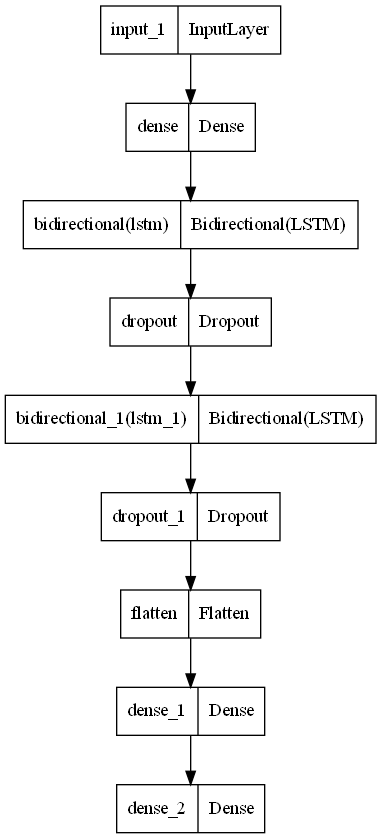

In [18]:
plot_model(lstm_model)